In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
df = pd.read_csv("Downloads/desafio_indicium_imdb.csv")

# importa as bibliotecas necessários

In [2]:
# ANÁLISE EXPLORATÓRIA

df.info() # Exibe algumas informações gerais do banco de dados: quantidade de linhas e colunas, nome das colunas, tipo dos dados, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [3]:
df.head(5) # Visão dos primeiros índices da tabela com os conteúdos dos dados

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [4]:
df.isnull().sum() # Verifica os valores nulos 

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [5]:
df['Released_Year'].unique() #Verifica os valores únicos, pois foi identificado o tipo dessa tabela como objeto, quando deveria ser inteiro.

array(['1972', '2008', '1974', '1957', '2003', '1994', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [6]:
# Coluna índice não contribui para a análise
# Presença de valores nulos nas colunas Gross, Meta_score e Certificate
# Coluna Gross, Run_time e Released_Year está com tipo objeto, quando deveria ser numérico

In [7]:
# Tratamento dos dados

df = df.drop(columns=['Unnamed: 0']) # Elimina a coluna de índices para simplificar a tabela, pois é um dado irrelevante para nossa análise.

df.dropna(inplace=True) #Elimina os valores nulos

df['Gross'] = df['Gross'].str.replace(",", "") #Elimina as vírgulas e transforma Gross em dados numéricos
df['Gross'] = pd.to_numeric(df['Gross'])

df['Runtime'] = df['Runtime'].str.replace("min", "") #Elimina 'min' e transforma Runtime em dados numéricos
df['Runtime'] = pd.to_numeric(df['Runtime'])

df = df[df['Released_Year']!='PG'] #Elimina o valor 'PG' pois não é numérico
df['Released_Year'] = pd.to_numeric(df['Released_Year']) #Transforma Released_Year em dados numéricos

In [8]:
df.head(5) # Visão dos primeiros índices da tabela com os conteúdos dos dados após o tratamento anterior

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
2,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
3,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
4,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905


In [9]:
df.dtypes #Tipos das colunas após o tratamento

Series_Title      object
Released_Year      int64
Certificate       object
Runtime            int64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross              int64
dtype: object

In [14]:
df.describe() #Análise descritiva

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,712.000000,712.000000,712.000000,712.000000,7.120000e+02,7.120000e+02
mean,1995.738764,123.667135,7.935674,77.154494,3.534662e+05,7.845017e+07
std,18.611182,25.907607,0.288928,12.418115,3.464502e+05,1.150686e+08
min,1930.000000,72.000000,7.600000,28.000000,2.522900e+04,1.305000e+03
25%,1986.750000,104.000000,7.700000,69.750000,9.566475e+04,6.143199e+06
50%,2001.000000,120.000000,7.900000,78.000000,2.359815e+05,3.485015e+07
75%,2010.000000,136.000000,8.100000,86.000000,5.065428e+05,1.023606e+08
max,2019.000000,238.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


In [82]:
df[df['IMDB_Rating'] == df['IMDB_Rating'].max()]  #Para identificar o filme com maior nota no IMDB

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411


<Axes: title={'center': 'Distribuição de notas do IMDB'}, xlabel='IMDB_Rating'>

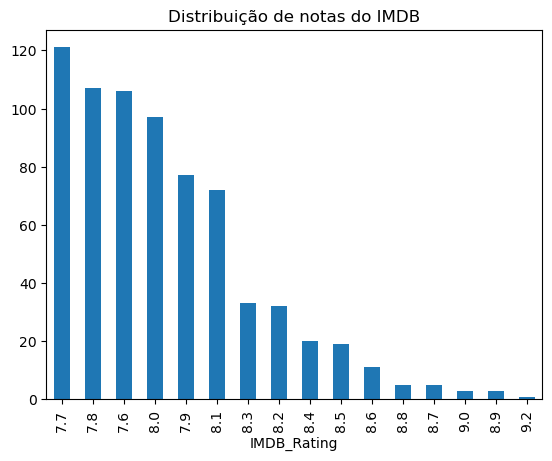

In [75]:
df['IMDB_Rating'].value_counts().plot(kind='bar', title = "Distribuição de notas do IMDB")#Gráfico das notas do IMDB

In [16]:
df.sort_values(by='Gross', ascending=False).head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
476,Star Wars: Episode VII - The Force Awakens,2015,U,138,"Action, Adventure, Sci-Fi",7.9,"As a new threat to the galaxy rises, Rey, a de...",80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225
58,Avengers: Endgame,2019,UA,181,"Action, Adventure, Drama",8.4,After the devastating events of Avengers: Infi...,78.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000
622,Avatar,2009,UA,162,"Action, Adventure, Fantasy",7.8,A paraplegic Marine dispatched to the moon Pan...,83.0,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1118998,760507625
59,Avengers: Infinity War,2018,UA,149,"Action, Adventure, Sci-Fi",8.4,The Avengers and their allies must be willing ...,68.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,834477,678815482
651,Titanic,1997,UA,194,"Drama, Romance",7.8,A seventeen-year-old aristocrat falls in love ...,75.0,James Cameron,Leonardo DiCaprio,Kate Winslet,Billy Zane,Kathy Bates,1046089,659325379


In [83]:
#Para uma pessoa desconhecida, eu daria a informação do melhor filme segundo o IMDB e uma lista dos 5 filmes com melhor sucesso de bilheteria.
#O tipo de problema para uma previsão da nota do IMDB a partir dos dados é um  problema de regressão.